In [1]:
%matplotlib inline
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from pandas_datareader import data, wb

import os
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

path1 = os.path.join(os.getcwd(),'style-table.css')
path2 = os.path.join(os.getcwd(),'style-notebook.css')

css = open(path1).read() + open(path2).read()
HTML('<style>{}</style>'.format(css))

### lmplot in seaborn

In [2]:
# seaborn comes with sample data sets, we read them in

tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

tips['tip_perct'] = (100 * tips.tip) / tips.total_bill

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_perct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


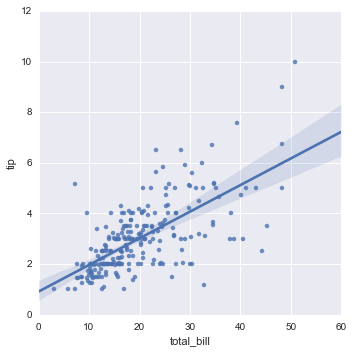

In [9]:
# make plot of tips vs total bill
# lmplot makes a scatterplot of all points + lin reg line

sns.lmplot('total_bill','tip',tips)

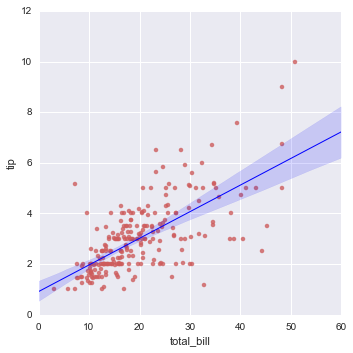

In [10]:
# pass custom arguments for the scatterplot and the line

sns.lmplot('total_bill','tip',tips,
           scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':1,'color':'blue'})

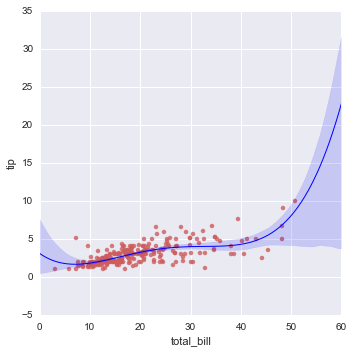

In [11]:
# change to 4th order polynomial fit

sns.lmplot('total_bill','tip',tips,order=4,
           scatter_kws={'marker':'o','color':'indianred'},
           line_kws={'linewidth':1,'color':'blue'})

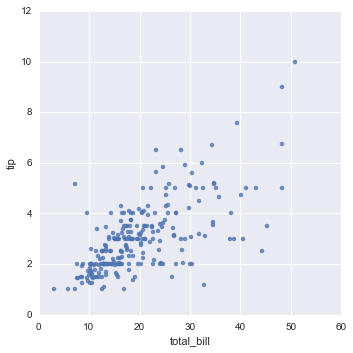

In [19]:
# take away the regression line

sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


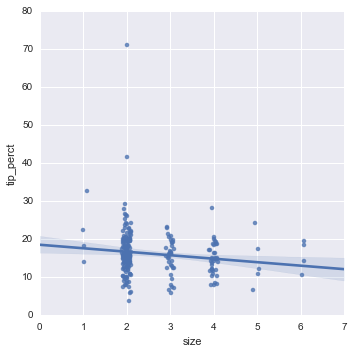

In [11]:
sns.lmplot('size','tip_perct',tips,x_jitter=0.1)

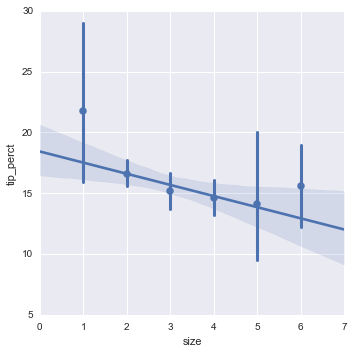

In [12]:
# show estimate for tendency of each bin

sns.lmplot('size','tip_perct',tips,x_estimator=np.mean)

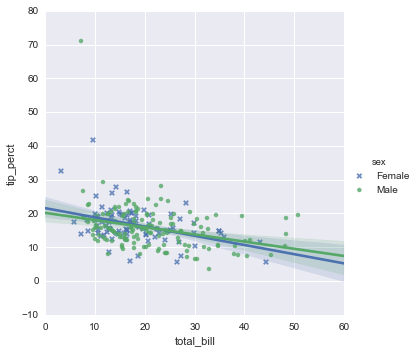

In [15]:
# 2 regrression plots on top of each other
# who tips more, males or females

sns.lmplot('total_bill','tip_perct',tips,hue='sex',
          markers=['x','o'])

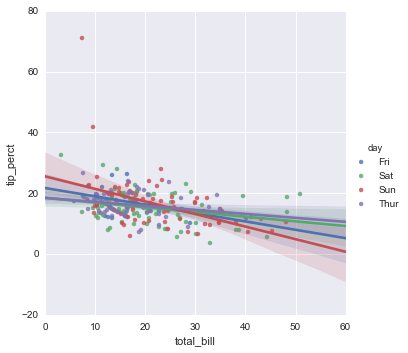

In [12]:
# does the day make a difference in tip size?

sns.lmplot('total_bill','tip_perct',tips,hue='day')

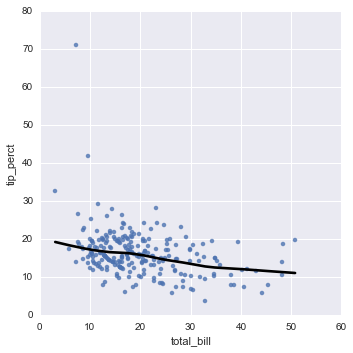

In [13]:
# seaborn also supports local regression model fitting

sns.lmplot('total_bill','tip_perct',tips,lowess=True,
          line_kws={'color':'black'})

### regplot in seaborn

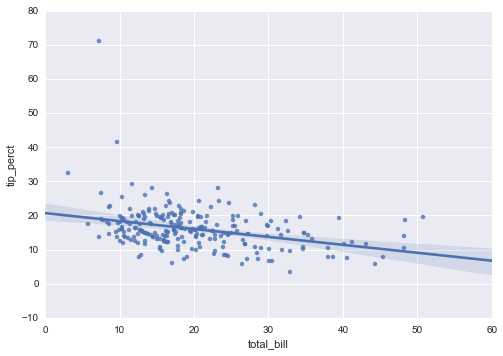

In [14]:
# if we zoom out a bit
# lmplot actually uses a lower level function regplot
# regplot is more robust

sns.regplot('total_bill','tip_perct',tips)

### subplots in seaborn

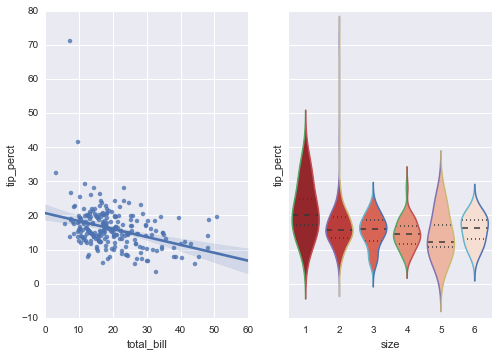

In [16]:
# create 2 subplots using regplot

fig, (axis1,axis2) = plt.subplots(nrows=1,ncols=2,sharey=True)

sns.regplot('total_bill','tip_perct',tips,ax=axis1)
sns.violinplot(tips['tip_perct'],tips['size'],
               color='Reds_r',ax=axis2)

### heatmap in seaborn

In [26]:
# re-load a dataset that comes with seaborn

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [27]:
#pivot this dataframe df.pivot(to_left,to_top,data)
# result is great for a heatmap

flights = flights.pivot('month','year','passengers')
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417


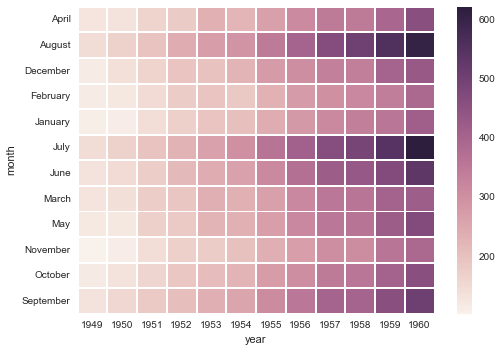

In [4]:
# seaborn tries to pick the best colors for the dataset

sns.heatmap(flights)

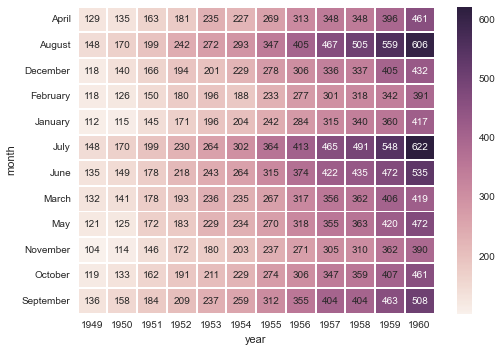

In [34]:
# annotate each cell with number

sns.heatmap(flights,annot=True,fmt='d')

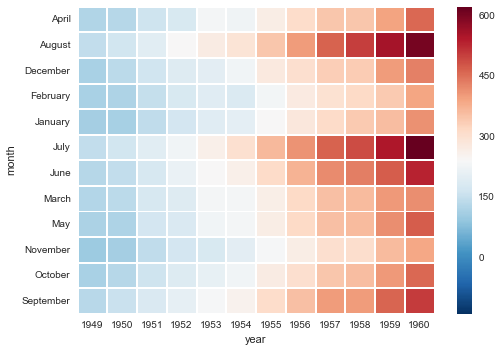

In [5]:
# create your own center for your colormap

sns.heatmap(flights,center=flights.loc['January',1955])

### clustermap in seaborn

In [28]:
# re-load a dataset that comes with seaborn
# pivot this dataframe df.pivot(to_left,to_top,data)
# result is great for a heatmap

flights = sns.load_dataset('flights')
flights = flights.pivot('month','year','passengers')

flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417


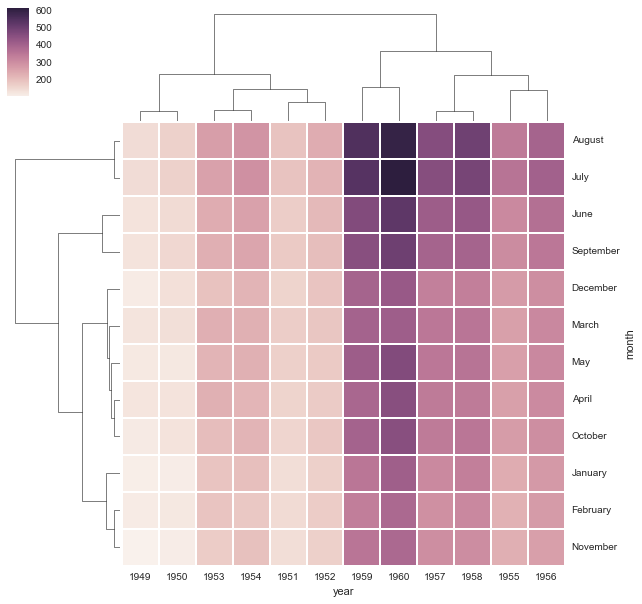

In [29]:
sns.clustermap(flights)

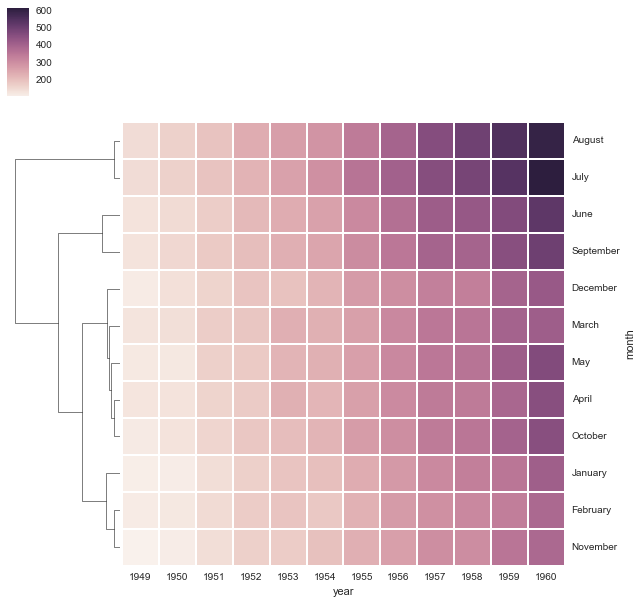

In [30]:
# only cluster by the month, not year

sns.clustermap(flights,col_cluster=False)

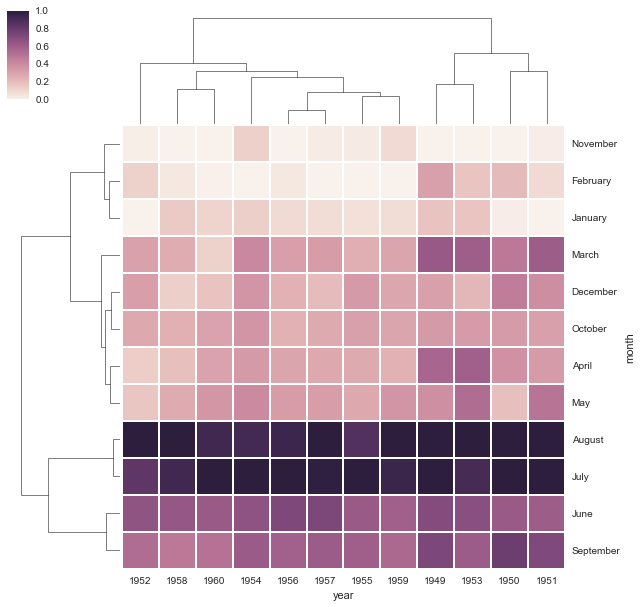

In [31]:
# standardize by column (by year)
# scale will be from 0 to 1
# eliminate problem of flights increasing every year

sns.clustermap(flights,standard_scale=1)

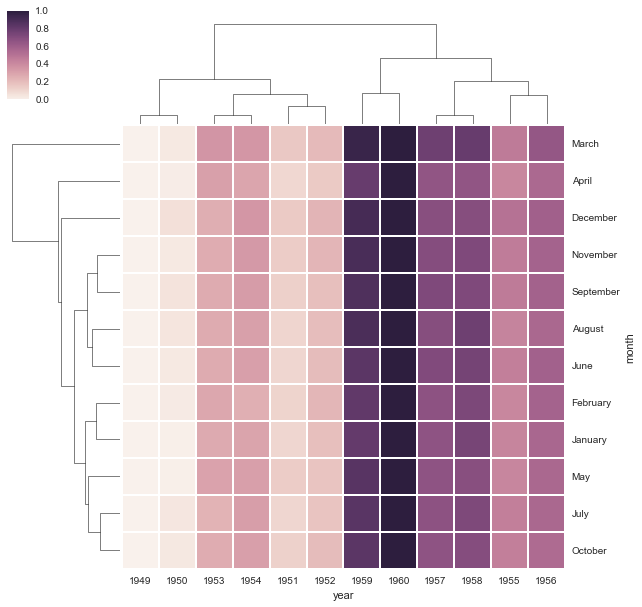

In [32]:
# scale by rows

sns.clustermap(flights,standard_scale=0)

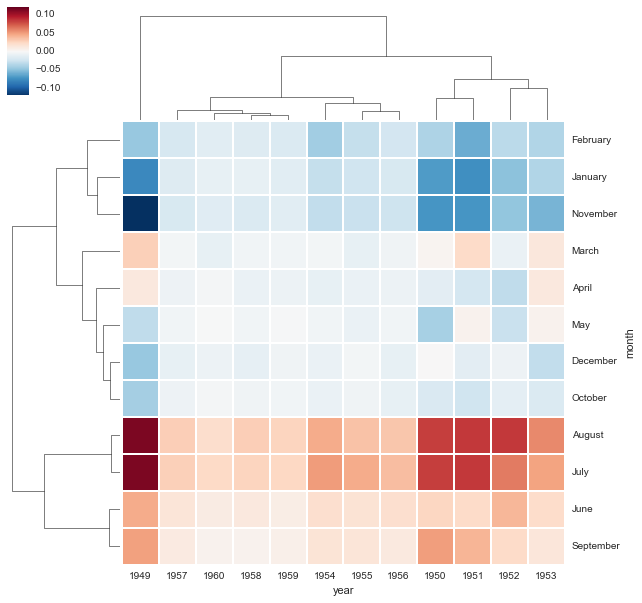

In [33]:
# normalize by z score
# z score subtracts the mean and divides by std deviation
# rows have a mean of 0 and a variance of 1

sns.clustermap(flights,z_score=1)